# Interactive Data Visualisation with Bokeh

**What we cover:**

**Part 1 - Introduction to Bokeh**
- Bokeh - why it is useful?
- Bokeh terminology
- Importing functions from Bokeh interfaces
- Importing Data

**Part 2 - Plotting with Bokeh**
- Figure object
- Basic Scatter plot
- Detailed Scatter plot 
- Scatter plot with tooltips 
- Save bokeh plot as a HTML file
- Working bokeh widgets

**Part 3 - Introduction to Pandas-Bokeh**


# Part 1 - Introduction to Bokeh

### ☑️ Bokeh - why it is useful?

- Facilitates creation of **interactive charts** for web browsers
    - Tools to **zoom in** on a plot and **save an image** of it
    - Add **tooltips** which show additional data when a point is hovered on


- **HTML** and **Javascript** output, produced with **Python** code
    - Facilitates simple **sharing** of html files with people who do not use Python or Jupyter notebooks

### ☑️ Bokeh terminology

**Figures**: the '**canvas**' onto which we plot
- axes, grids and tools (such as zoom, scroll and save)


**Glyphs**: typically our **datapoints**
- the lines, circles, bars, etc which are plotted onto a figure


**Interfaces**: provides functions with which Bokeh visualisations are built
- can be customised when more specific visualisation is required 


**Widgets**: additional **user interface components** outside of a plot
- tabs, drop-down menus, sliders and buttons

### ☑️ Importing fuctions from Bokeh interfaces

- Think of these interfaces as a collection of functions. Here we are importing some commonly used fuctions from `bokeh.plotting` and `bokeh.models` interfaces

- These interfaces allow users to create basic plots with very few customisable parameters to advanced plots with full control over their visualisations. For more details on [interfaces](https://docs.bokeh.org/en/latest/docs/reference.html#reference)

In [ ]:
from bokeh.plotting import figure, output_notebook, show, save
from bokeh.models import ColumnDataSource, HoverTool

output_notebook() #specify the Bokeh plots should be embedded within the Jupyter notebook

import pandas as pd

- The `figure()` in `bokeh.plotting` facilitates the creation of plots by adding a **default set of tools and styles**
- Running `output_notebook()` results in our plots being shown in the notebook when `show()` is run
- The `save()` allows to **save a HTML file** of our plots

We have also imported some **classes** from the `bokeh.models` module, which is a **lower-level interface**
ColumnDataSource, HoverTool

### ☑️ Importing Data

- Let's load the dataset `mpg.csv` with `pandas`. The dataset is regarding car specifications. This dataset can be used to discover factors affecting mpg (miles per gallon) of a car. The Dataset contains 398 observations

- We have added new column **`color_column`** to `df`, using a dictionary to enter values based on `origin`

**Let’s visualise it to discover valuable insights using Bokeh visualisation tools.**

In [ ]:
df = pd.read_csv('data/mpg.csv')

origin_colors = {'usa':'#CE1141', 'japan': 'orange', 'europe': 'blue'}
df['color_column'] = [origin_colors[x] for x in df['origin']]

df.sample(5)

# Part 2 - Plotting with Bokeh

####  <span style='background :yellow' > <font color='black'>Figure object</font> </span>

Creating an instance of `figure` called `p1` and then calling `show()` function, outputs an empty plot with the default tools next to it.

 - Bokeh also gives us a `WARNING` that the `Plot has no renderers`, i.e. nothing to place onto it

In [ ]:
#Example1

p1 = figure(width=400, height=400)
show(p1)

####  <span style='background :yellow' > <font color='black'>Basic Scatter plot</font> </span>

In [ ]:
data = ColumnDataSource(df)

p2 = figure(width=400, height=400)

p2.scatter(x='weight', 
           y='mpg', 
           source=data, 
           marker='square', 
           size=8, 
           alpha=0.8,
           fill_color='color_column', 
           legend_group='origin')


show(p2)

- We created a `ColumnDataSource` instance called `data` from `df`. Bokeh's `ColumnDataSource` is what it uses to pass information to various glyphs and plots. More details can be found [here](https://docs.bokeh.org/en/latest/docs/user_guide/basic/data.html#ug-basic-data-cds)

- `p2` instance has **inherited** various methods from `figure` **class definition**, including the `.scatter()` method

- We used `data` as the `source` argument, This allowed us to use the column names from `df` for the `x` and `y` parameters

- We also modified the [marker](https://docs.bokeh.org/en/2.4.2/docs/reference/models/markers.html#scatter) style, `size`,  `alpha` levels for the datapoints

- We passed `color_column` to the `fill_color` parameter and the `legend_group` parameter allowed us to create a legend based on the `origin` column

####  <span style='background :yellow' > <font color='black'>Detailed Scatter plot</font> </span>

In [ ]:
#Example3

data = ColumnDataSource(df)

p3 = figure(width=400, height=400)

p3.scatter(x='horsepower', 
           y='weight', 
           source=data, 
           marker="circle", 
           size=8, 
           alpha=0.8, 
           fill_color='color_column', 
           legend_group='origin')



# To customise the plot - use bokeh figure methods
p3.title.text = "Horsepower vs Weight Analysis"
p3.title.text_font_size = '10pt'

p3.xaxis.axis_label = 'Car Horsepower'
p3.yaxis.axis_label = 'Car Weight'

p3.xaxis.axis_label_text_font_style = 'italic'
p3.yaxis.axis_label_text_font_style = 'bold'

p3.x_range.end = 350
p3.y_range.end = 7000

p3.xaxis.minor_tick_line_width = 1
p3.yaxis.minor_tick_line_width = 1

p3.toolbar_location='left'

p3.xgrid[0].grid_line_color='gray'
p3.xgrid[0].grid_line_alpha=0.8

show(p3)

We created a new Figure, `p3` and used the `.scatter()` method as before. We can customise the `p3` with **bokeh Figure methods**.

- We changed the `title.text`, `title.text_font_size`
- We changed the `axis_label` and its `font_style` for both `xaxis` and `yaxis`
- We changed the `x_range.end`, `y_range.end`, `xaxis.minor_tick_line_width`, `xaxis.minor_tick_line_width`, `grid_line_color` and `grid_line_alpha`
- We changed the `toolbar_location`
- More details can be found [here](https://docs.bokeh.org/en/latest/docs/reference/plotting/figure.html)


####  <span style='background :yellow' > <font color='black'>Scatter plot with tooltips</font> </span>

In [ ]:
data = ColumnDataSource(df)

p4 = figure(width=400,
            height=400,
            tools='',
            tooltips=[('Model', '@name'), ('Country', '@origin')])


p4.scatter(x='horsepower', 
           y='acceleration',
           source=data,
           size=8,
           fill_color='color_column',
           legend_group='origin')



#customise bokeh figure methods
p4.title.text = "Horsepower vs Acceleration"
p4.xaxis.axis_label = 'Car Horsepower'
p4.yaxis.axis_label = 'Car Acceleration'  #Amount of time it takes to go from 0 to 60 mph, measured in seconds

show(p4);

- When creating the `Figure` instance `p4` we passed an empty string to `tools`, this resulted in the removal of the tools from the toolbar
- The `tooltips` parameter allows us to show information when the user hovers on a datapoint. Each `tuple` in the list is in the format `(displayed_feature_name, @name_of_column_in_df)`

####  <span style='background :yellow' > <font color='black'>Save bokeh plot as a HTML file</font> </span>

In [ ]:
save(p4, filename='data/hp-acc.html', resources='inline', title='Horsepower vs Acceleration');

- The `save` function from `bokeh.plotting` allows us to create a **HTML file** of the plot
    - The file is called `hp-acc.html` and has been saved to the `data` folder
    - Passing `inline` to `resources` packages the required Javascript within the file
    - The assigned `title` can be seen in the HTML code of the file
- The HTML file can be viewed in any **web browser** 
    - Hovering on a datapoint reveals the features specified in `tooltips`

####  <span style='background :yellow' > <font color='black'>Working bokeh widgets</font> </span>

In [ ]:
from bokeh.models.widgets import Tabs, Panel

wght_panel = Panel(child=p3, title='Weight')
acc_panel = Panel(child=p4, title='Acceleration')

both = Tabs(tabs=[wght_panel, acc_panel])
show(both)

- To find out more about tabs and other [widgets](https://docs.bokeh.org/en/latest/docs/user_guide/interaction/widgets.html)

- Bokeh has various layout options like columns, rows, gridplot and layout objects, to find more information on [layouts](https://docs.bokeh.org/en/latest/docs/reference/layouts.html)

# Part 3 - Introduction to Pandas-Bokeh

- **Pandas-Bokeh** is a  library which brings together bokeh and the pandas 
- `.plot_bokeh()` method, simplifying the creation of interactive bokeh plots from pandas DataFrames

### ☑️ Setting up the environment

In [ ]:
import pandas_bokeh
pd.set_option('plotting.backend', 'pandas_bokeh')

import warnings
warnings.filterwarnings('ignore')

The pandas `.set_option()` method allows us to set `pandas_bokeh` as the pandas `plotting.backend`
- `pandas_bokeh` will be used when the DataFrame `.plot_bokeh()` method is called

- `filterwarnings` is set to `ignore`, to ignore any unnecessary warning messages about the future deprecation of a bokeh feature used by pandas_bokeh

####  <span style='background :yellow' > <font color='black'>Basic Scatter plot</font> </span>

In [ ]:
fig = df.plot_bokeh(x='weight', y='mpg', kind='scatter', category='origin', alpha=0.6)


- We can call the `.plot()` method on the DataFrame as we have seen previously
    - `x`, `y`, `kind`, and `alpha` parameters work as previously seen
    - `category` is a **pandas-bokeh** parameter, which works similarly to `hue` in seaborn
        - **clickable legend** provides datapoint filtering

####  <span style='background :yellow' > <font color='black'>Detailed Scatter plot</font> </span>

In [ ]:
fig = df.plot_bokeh(x='weight', y='mpg', kind='scatter', category='origin', alpha=0.6, show_figure=False)


#customise the figure
fig.title.text = 'Car weight vs fuel efficiency'
fig.title.text_font_size = '14pt'
fig.xaxis.axis_label, fig.yaxis.axis_label  = ('Weight (kg)', 'Fuel efficiency (mpg)')
fig.xaxis.minor_tick_line_width, fig.yaxis.minor_tick_line_width = (0, 0)
fig.xaxis.axis_label_text_font_style, fig.yaxis.axis_label_text_font_style = ('bold', 'bold')
fig.toolbar_location=None
show(fig)

We can assign the underlying bokeh figure to a variable `fig` and then customise it using **bokeh figure methods**.

- We changed the `axis_label` and its `font_style` for both `xaxis` and `yaxis`
- We changed the `title.text` and its `text_font_size`
- We removed the toolbar by setting `toolbar_location` to `None`
- If `show_figure` parameter is not set to `False`, you will see two plots getting created
- The `show()` method will display the customised plot

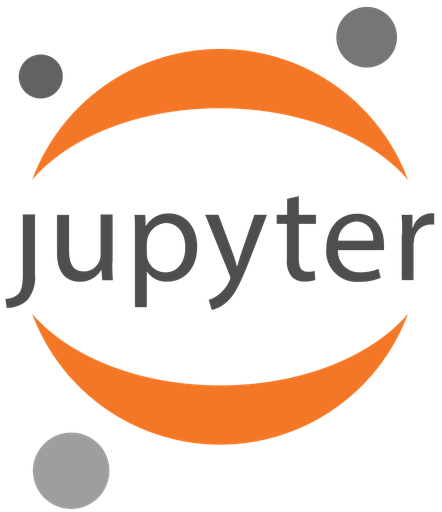

Now open the following workbook: `bokeh-workbook.ipynb`